https://course.spacy.io/en

In [1]:
# Load the Drive helper and mount.
# from google.colab import drive

# This will prompt for authorization.
# drive.mount('/content/drive')

In [8]:
# !pip install category_encoders

In [7]:
# !python -m spacy download "pt_core_news_sm"

In [15]:
%load_ext autoreload
%autoreload 2

In [16]:
import itertools
import os
import sys
import math
import logging
from pathlib import Path
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import classification_report
import numpy as np
import scipy as sp
import sklearn
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import unidecode
import spacy
#from category_encoders import TargetEncoder

matplotlib.rcParams['figure.figsize'] = (8,4)


In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (12,8)})
sns.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)


In [23]:
sys.path.append("/app/src")

### Loading data

In [24]:
df = pd.read_csv('/app/data/train_df.csv', sep=",")
print(df.shape)
df.head()

(105898, 15)


index      submission_date  \
0   95851  2018-04-20 11:56:28   
1  115536  2018-05-10 18:56:36   
2    1254  2018-01-02 07:02:48   
3   86792  2018-04-11 16:45:45   
4   35543  2018-02-02 16:30:23   

                                         reviewer_id product_id  \
0  c951f3a4511b554a1f34330903c320f34cfccbdf8de357...  111586438   
1  21da6d1c6d022a5c67da402d3082c7c438660f4252b7c3...   19399940   
2  eaf2f059cbb702e377bf95ac998aa4365f851937a3b419...   22747780   
3  e5bb0709d14bc4a00aeaeb1f111616e69f57239dff7da6...   22857850   
4  420a3ab1adf3c6010d491c8def04e19b1439ed01df7038...  132207708   

                                        product_name product_brand  \
0     Depilador Elétrico Philips Satinelle HP6403/30       philips   
1  Hidratante Corporal Dior Addict Body Mist Femi...           NaN   
2  Controle Com Fio Para Xbox 360 Slim / Fat E Pc...           NaN   
3  Kit Edredom + Lençol Aconchego Dupla Face Casa...           NaN   
4  Smartphone Motorola Moto E4 Dual Chip Android ...      motorola   

         site_category_lv1   site_category_lv2  \
0      Beleza e Perfumaria           Depilação   
1      Beleza e Perfumaria  Tratamento de Pele   
2                    Games            Xbox 360   
3       Cama, Mesa e Banho             Edredom   
4  Celulares e Smartphones          Smartphone   

                            review_title recommend_to_a_friend  \
0                              Depilador                   Yes   
1                         Cheiro de rica                   Yes   
2                            Bom produto                   Yes   
3  Nao recebi onprofuto e nem satisfacao                    No   
4                   Excelente aquisição!                   Yes   

                                         review_text  reviewer_birth_year  \
0  Muito eficiente e prático! Depilação rápida em...               1978.0   
1  Adoro o perfume que fica na pele, ele não é um...               1986.0   
2  funciona o que é importante bom produto o text...               1978.0   
3  Gostaria de saber da minha entrega ate hoje na...               1969.0   
4  Entrega super rápida!  Quando da compra tive c...               1965.0   

  reviewer_gender reviewer_state  overall_rating  
0               F             ES               5  
1               F             SP               5  
2               M             ES               3  
3               F             RJ               1  
4               M             PE               4

In [25]:
df.sample(n=1).T

78531
index                                                                589
submission_date                                      2018-01-01 17:17:08
reviewer_id            b6f1af96332cb3e62d13f548af4e99b6d9f47669bf74cc...
product_id                                                     132439701
product_name           Smart TV LED 39" Philco PH39N86DSGW HD com Con...
product_brand                                                        NaN
site_category_lv1                                      TV e Home Theater
site_category_lv2                                                     TV
review_title                                    Atendeu as expectativas.
recommend_to_a_friend                                                Yes
review_text            A TV atendeu as expectativas, veio dentro do p...
reviewer_birth_year                                                 1993
reviewer_gender                                                        F
reviewer_state                                                        SC
overall_rating                                                         5

5    38315
4    25855
1    21998
3    13004
2     6726
Name: overall_rating, dtype: int64


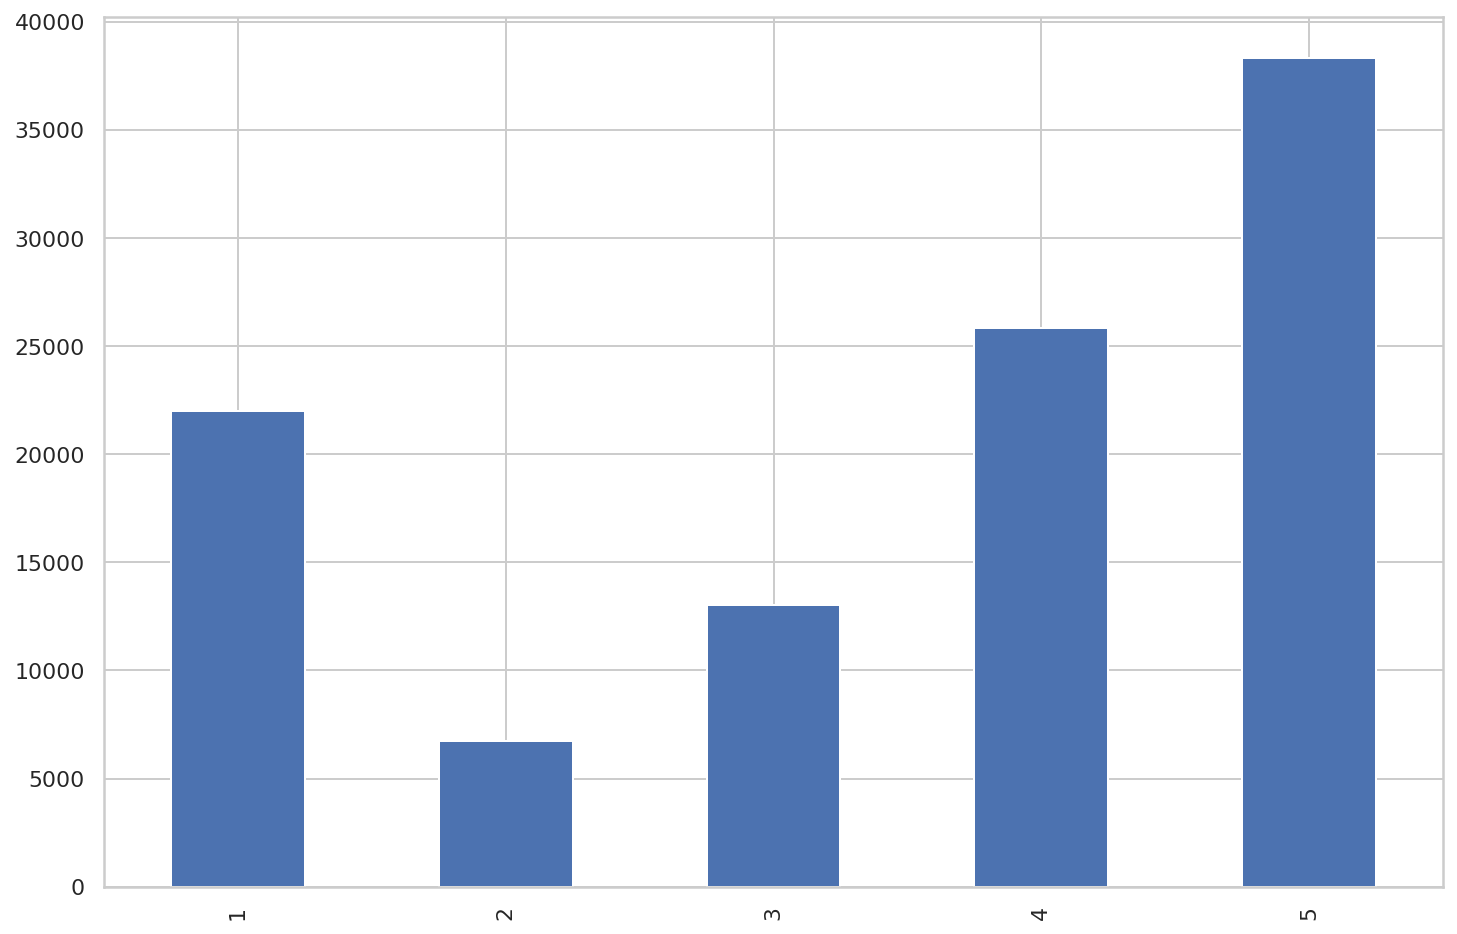

In [26]:
chart = df['overall_rating'].value_counts()
print(chart)
chart.sort_index(inplace=True)
chart.plot(kind='bar')

### Preprocessing

In [27]:
from preprocess import Preprocess

prep = Preprocess()

In [28]:
# !python -m spacy download pt_core_news_lg

In [29]:
nlp = spacy.load("pt_core_news_lg")

In [30]:
stop_words = spacy.lang.pt.STOP_WORDS

In [31]:
data = pd.DataFrame()
data['target'] = df.overall_rating

In [32]:
data['review'] = df.review_text

In [ ]:
data = prep.tranform(data, 'review')

clearning text...
removing stop words...


In [ ]:
data.to_csv("../data/interim/data.csv", index=False)

In [ ]:
data.review

In [ ]:
text = data.review.sample(n=1).values[0]

print(text)

In [ ]:
doc = nlp(text)

" ".join([token.text for token in doc if not token.text is token.is_stop])

In [ ]:
text = "paguei 30 conto nela!!"

text = re.sub("\d+", "", text)
text = re.sub(" +", " ", text)
text

## Spacy

### Cleansing

In [ ]:
str_input = "This &is [an] example? {of} string. with.? punctuation!!!!"
prep.clear_text(text)

In [ ]:
prep.get_pos_tag(text)

In [ ]:
hash = nlp.vocab.strings["lojas"]
print(hash)

In [ ]:
nlp.vocab.strings[hash]

In [ ]:
doc = nlp(text)
index = [token.i for token in doc]
tokens = [token.text for token in doc]
tokens

In [ ]:
prep.normalize(text)

In [ ]:
print(text)
unidecode.unidecode(text)

In [ ]:
print(text)
print()
print(re.sub("\W+", " ", text))

### similarities

In [ ]:
doc1 = nlp("Hj está um dia itália")
doc2 = nlp("hamburger é melhor que pizza")

doc1.similarity(doc2)

In [ ]:
token1 = doc1[-1]
token2 = doc2[-1]
token1.similarity(token2)

In [ ]:
# doc.vector

### custom word2vec

https://spacy.io/usage/vectors-similarity

In [90]:
!ls ../data/cbow_s100.zip

cbow_s100.zip  train_df.csv


In [92]:
!python -m spacy init-model en ../data/cbow_s100_vectors --vectors-loc ../data/cbow_s100.zip

✔ Successfully created model
929606it [00:39, 23296.79it/s]/cbow_s100.zip
✔ Loaded vectors from ../data/cbow_s100.zip
✔ Sucessfully compiled vocab
929994 entries, 929606 vectors


In [61]:
nlp_pt = spacy.load("../data/cbow_s100_vectors")

In [62]:
doc1 = nlp_pt("Eu adoro comer carne")
doc2 = nlp_pt("alface é bom mais")
doc1.similarity(doc2)

0.5514122482099489

In [63]:
re.sub('\w*\d\w*','', "este  item9 custou 6 reais")

'este   custou  reais'

In [64]:
re.sub('\W+', ' ', "este, ite3m! custou   6 reais?!?!?")

'este ite3m custou 6 reais '

### Spacy Pipelines

In [65]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [66]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x7fbfcc5d6fd0>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x7fbfcc8d84c8>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x7fbfcc8d8528>)]

In [67]:
doc = nlp('------ .olá, como foi o trabalho hj? ------')
doc.text
re.sub("\W+", " ", doc.text).strip()   

'olá como foi o trabalho hj'

In [68]:
doc = nlp(text)

In [69]:
sents_ = [re.sub("\W+", " ", sent.text) for sent in doc.sents]
sents_

['paguei conto nela ']

In [70]:
for sent in doc.sents:
    sent = sent.text.upper()
    print(sent)

PAGUEI CONTO NELA!!


In [86]:
!python -m spacy download "en_core_web_sm"

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [95]:
import en_core_web_sm
# spacy.load('en_core_web_sm')

In [97]:
import spacy
# Define the custom component

def clear_text(doc):
    text = re.sub("\W+", " ", doc.text).strip() 
    return nlp(text)
    
def length_component(doc):
    # Get the doc's length
    doc_length = len(doc)
    print(f"This document is {doc_length} tokens long.")
    # Return the doc
    return doc

def upper_text(doc):
    
    text = doc.text.upper()

# Load the small English model
nlp = en_core_web_sm.load() # spacy.load('en_core_web_sm')

# Add the component first in the pipeline and print the pipe names
nlp.add_pipe(length_component, name="length_component")
print(nlp.pipeline)

# Process a text
doc = nlp('olá, como foi o trabalho hj?')

[('tagger', <spacy.pipeline.pipes.Tagger object at 0x7fbf531e7438>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x7fbfcc8d8768>), ('ner', <spacy.pipeline.pipes.EntityRecognizer object at 0x7fbfcc8d87c8>), ('length_component', <function length_component at 0x7fbf63532ae8>)]
This document is 8 tokens long.


In [99]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

class EntityMatcher(object):
    name = "entity_matcher"

    def __init__(self, nlp, terms, label):
        patterns = [nlp.make_doc(text) for text in terms]
        self.matcher = PhraseMatcher(nlp.vocab)
        self.matcher.add(label, None, *patterns)

    def __call__(self, doc):
        matches = self.matcher(doc)
        for match_id, start, end in matches:
            span = Span(doc, start, end, label=match_id)
            doc.ents = list(doc.ents) + [span]
        return doc

nlp = en_core_web_sm.load()
terms = ("cat", "dog", "tree kangaroo", "giant sea spider")
entity_matcher = EntityMatcher(nlp, terms, "ANIMAL")

nlp.add_pipe(entity_matcher, after="ner")

print(nlp.pipe_names)  # The components in the pipeline

doc = nlp("This is a text about Barack Obama and a tree kangaroo")
print([(ent.text, ent.label_) for ent in doc.ents])

['tagger', 'parser', 'ner', 'entity_matcher']
[('Barack Obama', 'PERSON'), ('tree kangaroo', 'ANIMAL')]


In [100]:
from spacy.lang.en import English
from spacy.tokens import Token

nlp = English()

# Register the Token extension attribute "is_country" with the default value False
Token.set_extension("is_country", default=False)

# Process the text and set the is_country attribute to True for the token "Spain"
doc = nlp("I live in Spain.")
doc[3]._.is_country = True

# Print the token text and the is_country attribute for all tokens
print([(token.text, token._.is_country) for token in doc])

[('I', False), ('live', False), ('in', False), ('Spain', True), ('.', False)]


In [101]:
from spacy.lang.en import English
from spacy.tokens import Token

nlp = English()

# Define the getter function that takes a token and returns its reversed text
def get_reversed(token):
    return token.text[::-1]


# Register the Token property extension "reversed" with the getter get_reversed
Token.set_extension("reversed", getter=get_reversed)

# Process the text and print the reversed attribute for each token
doc = nlp("All generalizations are false, including this one.")
for token in doc:
    print("reversed:", token._.reversed)

reversed: llA
reversed: snoitazilareneg
reversed: era
reversed: eslaf
reversed: ,
reversed: gnidulcni
reversed: siht
reversed: eno
reversed: .


In [102]:
from spacy.lang.en import English
from spacy.tokens import Doc

nlp = English()

# Define the getter function
def get_has_number(doc):
    # Return if any of the tokens in the doc return True for token.like_num
    return any(token.like_num for token in doc)


# Register the Doc property extension "has_number" with the getter get_has_number
Doc.set_extension("has_number", getter=get_has_number)

# Process the text and check the custom has_number attribute
doc = nlp("The museum closed for five years in 2012.")
print("has_number:", doc._.has_number)

has_number: True


In [103]:
from spacy.lang.en import English
from spacy.tokens import Span

nlp = English()

# Define the method
def to_html(span, tag):
    # Wrap the span text in a HTML tag and return it
    return f"<{tag}>{span.text}</{tag}>"


# Register the Span method extension "to_html" with the method to_html
Span.set_extension("to_html", method=to_html)

# Process the text and call the to_html method on the span with the tag name "strong"
doc = nlp("Hello world, this is a sentence.")
span = doc[0:2]
print(span._.to_html("strong"))

<strong>Hello world</strong>


In [108]:
import spacy
from spacy.tokens import Span

nlp = en_core_web_sm.load()


def get_wikipedia_url(span):
    # Get a Wikipedia URL if the span has one of the labels
    if span.label_ in ("PERSON", "ORG", "GPE", "LOCATION"):
        entity_text = span.text.replace(" ", "_")
        return "https://en.wikipedia.org/w/index.php?search=" + entity_text


# Set the Span extension wikipedia_url using get getter get_wikipedia_url
# Span.set_extension("wikipedia_url", getter=get_wikipedia_url)

doc = nlp(
    "In over fifty years from his very first recordings right through to his "
    "last album, David Bowie was at the vanguard of contemporary culture."
)

for ent in doc.ents:
    # Print the text and Wikipedia URL of the entity
    print(ent.text, ent._.wikipedia_url)

over fifty years None
first None
David Bowie https://en.wikipedia.org/w/index.php?search=David_Bowie


In [ ]:
import json
from spacy.lang.en import English
from spacy.tokens import Span
from spacy.matcher import PhraseMatcher

with open("exercises/en/countries.json") as f:
    COUNTRIES = json.loads(f.read())

with open("exercises/en/capitals.json") as f:
    CAPITALS = json.loads(f.read())

nlp = English()
matcher = PhraseMatcher(nlp.vocab)
matcher.add("COUNTRY", None, *list(nlp.pipe(COUNTRIES)))


def countries_component(doc):
    # Create an entity Span with the label "GPE" for all matches
    matches = matcher(doc)
    doc.ents = [Span(doc, start, end, label="GPE") for match_id, start, end in matches]
    return doc


# Add the component to the pipeline
nlp.add_pipe(countries_component)
print(nlp.pipe_names)

# Getter that looks up the span text in the dictionary of country capitals
get_capital = lambda span: CAPITALS.get(span.text)

# Register the Span extension attribute "capital" with the getter get_capital
Span.set_extension("capital", getter=get_capital)

# Process the text and print the entity text, label and capital attributes
doc = nlp("Czech Republic may help Slovakia protect its airspace")
print([(ent.text, ent.label_, ent._.capital) for ent in doc.ents])

In [122]:
TEXTS = ['McDonalds is my favorite restaurant.', 
        'Here I thought @McDonalds only had precooked burgers but it seems they only have not cooked ones?? I have no time to get sick..', 
        'People really still eat McDonalds :(', 'The McDonalds in Spain has chicken wings. My heart is so happy ', 
        '@McDonalds Please bring back the most delicious fast food sandwich of all times!!....The Arch Deluxe :P', 
        'please hurry and open. I WANT A #McRib SANDWICH SO BAD! :D', 
        'This morning i made a terrible decision by gettin mcdonalds and now my stomach is payin for it']

# TEXTS =  TEXTS*1000

import json
import spacy

nlp = en_core_web_sm.load()


def bad_performance(TEXTS):
    #Process the texts and print the adjectives
    for text in TEXTS:
        doc = nlp(text)
        result = [token.text for token in doc if token.pos_ == "ADJ"]
    
# better perfrmance
def good_performance(TEXTS):
    for doc in nlp.pipe(TEXTS):
        result = [token.text for token in doc if token.pos_ == "ADJ"]


In [145]:
good_performance(TEXTS*5000)

In [146]:
bad_performance(TEXTS*5000)

In [149]:
import json
import spacy

nlp = en_core_web_sm.load()
    
# Process the texts and print the entities
docs = list(nlp.pipe(TEXTS))
entities = [doc.ents for doc in docs]
print(*entities)

(McDonalds,) (@McDonalds,) (McDonalds,) (McDonalds, Spain) (times!!, The Arch Deluxe) (#McRib SANDWICH,) (This morning, gettin mcdonalds)


In [152]:
from spacy.lang.en import English

nlp = English()

people = ["David Bowie", "Angela Merkel", "Lady Gaga"]

# Create a list of patterns for the PhraseMatcher
patterns = list(nlp.pipe(people, ))
patterns

[David Bowie, Angela Merkel, Lady Gaga]

In [157]:
DATA  = [['One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.', {'author': 'Franz Kafka', 'book': 'Metamorphosis'}], 
        ["I know not all that may be coming, but be it what it will, I'll go to it laughing.", {'author': 'Herman Melville', 'book': 'Moby-Dick or, The Whale'}],
        ['It was the best of times, it was the worst of times.', {'author': 'Charles Dickens', 'book': 'A Tale of Two Cities'}], 
        ['The only people for me are the mad ones, the ones who are mad to live, mad to talk, mad to be saved, desirous of everything at the same time, the ones who never yawn or say a commonplace thing, but burn, burn, burn like fabulous yellow roman candles exploding like spiders across the stars.', {'author': 'Jack Kerouac', 'book': 'On the Road'}], 
        ['It was a bright cold day in April, and the clocks were striking thirteen.', {'author': 'George Orwell', 'book': '1984'}], 
        ['Nowadays people know the price of everything and the value of nothing.', {'author': 'Oscar Wilde', 'book': 'The Picture Of Dorian Gray'}]]

import json
from spacy.lang.en import English
from spacy.tokens import Doc

nlp = English()


# Register the Doc extension "author" (default None)
Doc.set_extension("author", default=None, force=True)

# Register the Doc extension "book" (default None)
Doc.set_extension("book", default=None, force=True)

for doc, context in nlp.pipe(DATA, as_tuples=True):
    # Set the doc._.book and doc._.author attributes from the context
    doc._.book = context["book"]
    doc._.author = context["author"]

    # Print the text and custom attribute data
    print(f"{doc.text}\n — '{doc._.book}' by {doc._.author}\n")

One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.
 — 'Metamorphosis' by Franz Kafka

I know not all that may be coming, but be it what it will, I'll go to it laughing.
 — 'Moby-Dick or, The Whale' by Herman Melville

It was the best of times, it was the worst of times.
 — 'A Tale of Two Cities' by Charles Dickens

The only people for me are the mad ones, the ones who are mad to live, mad to talk, mad to be saved, desirous of everything at the same time, the ones who never yawn or say a commonplace thing, but burn, burn, burn like fabulous yellow roman candles exploding like spiders across the stars.
 — 'On the Road' by Jack Kerouac

It was a bright cold day in April, and the clocks were striking thirteen.
 — '1984' by George Orwell

Nowadays people know the price of everything and the value of nothing.
 — 'The Picture Of Dorian Gray' by Oscar Wilde



In [159]:
import spacy

nlp = en_core_web_sm.load()
text = (
    "Chick-fil-A is an American fast food restaurant chain headquartered in "
    "the city of College Park, Georgia, specializing in chicken sandwiches."
)

# Only tokenize the text
doc = nlp.make_doc(text)
print([token.text for token in doc])

['Chick', '-', 'fil', '-', 'A', 'is', 'an', 'American', 'fast', 'food', 'restaurant', 'chain', 'headquartered', 'in', 'the', 'city', 'of', 'College', 'Park', ',', 'Georgia', ',', 'specializing', 'in', 'chicken', 'sandwiches', '.']


In [160]:
import spacy

nlp = en_core_web_sm.load()
text = (
    "Chick-fil-A is an American fast food restaurant chain headquartered in "
    "the city of College Park, Georgia, specializing in chicken sandwiches."
)

# Disable the tagger and parser
with nlp.disable_pipes("tagger", "parser"):
    # Process the text
    doc = nlp(text)
    # Print the entities in the doc
    print(doc.ents)

(Chick-fil-A, American, College Park, Georgia)


### Spacy deep learning

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

print(text_features)
stopwords = get_stopwords()
noise_words = get_noise_words(df, feature)

X = df['review_text'].apply(lambda x: clear_text(x))
y = df[label_name]

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

['review_title', 'review_text']


KeyError: ignored

In [ ]:
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

nbclf = MultinomialNB(alpha = 0.8)
nbclf.fit(X_train_vectorized, y_train)

y_pred = nbclf.predict(vect.transform(X_test))
y_score = nbclf.predict_proba(vect.transform(X_test))

print(classification_report(y_test, y_pred))

In [ ]:
feature = "review_title"
tranform_text(df, feature, label_name)

In [ ]:
class_names = np.sort(df[label_name].unique())
print(class_names)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Normalized confusion matrix')

plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
result = pd.DataFrame(X_test[y_pred != y_test].copy())
result['y_pred'] = y_pred[y_pred != y_test]
result['y_test'] = y_test[y_pred != y_test]

In [ ]:
result.sample(n=5).values